
# MVP: *Machine Learning & Analytics*
**Curso: Pós Graduação Ciência de Dados e Analitycs- PUC - RJ**

**Autor:** Douglas da Silva Lima

**Data:** 27/08/2025

**Dataset:** [Base TSE-RJ](https://github.com/DougRio/MVP2/raw/main/perfil_comparecimento_abstencao_2024_RJ.csv.zip)


## ✅ Checklist do MVP (o que precisa conter)
- [ ] **Problema definido** e contexto de negócio
- [ ] **Carga e preparação** dos dados (sem vazamento de dados)
- [ ] **Divisão** em treino/validação/teste (ou validação cruzada apropriada)
- [ ] **Tratamento**: limpeza, transformação e **engenharia de atributos**
- [ ] **Modelagem**: comparar abordagens/modelos (com **baseline**)
- [ ] **Otimização de hiperparâmetros**
- [ ] **Avaliação** com **métricas adequadas** e discussão de limitações
- [ ] **Boas práticas**: seeds fixas, tempo de treino, recursos computacionais, documentação
- [ ] **Pipelines reprodutíveis** (sempre que possível)



## 1. Objetivo do trabalho e base de dados

**Requisitos MVP:**
https://pucrio.grupoa.education/plataforma/course/2571719/content/43920891


**Objetivo do trabalho:**
Atender os requisitos do enunciado do MVP (link Acima),resolver um problema de aprendizado de máquina (supervisionado ou não supervisionado) em um dos tipos de problema: classificação, regressão, clusterização ou previsão de séries temporais (forecasting). O problema pode estar em diferentes áreas de aplicação, como visão computacional, processamento de linguagem natural (NLP), ou outros domínios (dados tabulares, sensores, dados temporais, etc.). A solução pode empregar modelos clássicos de aprendizado de máquina e/ou aprendizado profundo (Deep Learning), treinados do zero ou via fine-tuning de modelos pré-treinados.

O MVP deve contemplar:

•⁠  ⁠Carga e preparação dos dados (quando pertinente; o MVP da sprint de Análise de Dados & Boas Práticas pode servir de base).
•⁠  ⁠Divisão dos dados adequada ao problema (treino, validação, teste; validação cruzada; sempre evitando vazamento de dados)
•⁠  ⁠Tratamento de dados: limpeza, transformação, seleção/extração de atributos, engenharia de atributos, etc.
•⁠  ⁠Modelagem: treinar e comparar abordagens e modelos diferentes; quando possível, usar pipelines reproduzíveis.
•⁠  ⁠Otimização de hiperparâmetros: explorar ajustes relevantes para cada modelo.
•⁠  ⁠Avaliação: utilizar métricas adequadas ao tipo de problema, comparar modelos e discutir limitações e melhorias.
•⁠  ⁠Boas práticas: estabelecer baseline, fixar seeds para reprodutibilidade, relatar recursos computacionais usados e tempo de treino, e documentar as decisões de projeto.


**Base de dados**: Neste trabalho, utilizei a base de dados do TSE (Tribunal Superior Eleitoral) relativo as eleições municipais do ano de 2024 no estado do Rio de Janeiro. Esta base apresenta dados de comparecimento e abstencao de eleitores para todos os municipios do estado em suas respectivas zonas e secoes eleitorais.

**Link para base de dados abertos:** URL: https://dadosabertos.tse.jus.br/dataset/comparecimento-e-abstencao-2024.

**Licenca - Nao ha**

**Arquivo CSV utilizado:** perfil_comparecimento_abstencao_2024_RJ.csv


## 2. Escopo, objetivo e definição do problema

**Contexto do Problema:**
O conjunto de dados Base TSE-RJ (Tribunal Superior Eleitoral) é um conjunto de dados relativo as eleições municipais do ano de 2024 no estado do Rio de Janeiro. Esta base apresenta dados de comparecimento e abstenção de eleitores para todos os municipios do estado em suas respectivas zonas e seções eleitorais.

Considerando que todos os cidadões são obrigados a votarem, com exceção das pessoas acima de 70 anos que podem votar; porém não obrigatório, penso que não comparecer pode estar relacionado com alguns fatores registrados no dataset como: **Faixa etária ou Escolaridade do eleitor ou genero ou raça ou até mesmo eleitores que solicitaram mudança de domicílio eleitoral.**

***Objetivo do trabalho***
Desenvolver/selecionar o melhor modelo de Machine learning que possa ser utilizado para determinar a probabiliade de um eleitor nao comparecer para votar com base nas classes analisadas** (Faixa etária ou nivel de Escolaridade do eleitor)**
Avaliar se com aplicacao dados nao vistos pelo modelo o mesmo consegue determinar se o eleitor irar comparecer ou nao para votar.

***Tipo de Tarefa***
Este é um problema de classificação supervisionada. Dado um conjunto de características (Escolaridade, Faixa Etaria e Abstencoes, Comparecimento), o objetivo é prever qual das caracteristicas tem maior relacao com a abstencao dos eleitores e assim determinar a probabilidade para novos dados.

***Valor para o negocio***
Acredito que determinando a probabilidade de abstencao, de faixa etaria ou nivel de escolaridade, o TSE poderia fazer campanhas de motivacao nas faixas com maior possibilidade de abstencao, tornando assim a participacao ao direito do voto em maior escala do que a atual.


## 3. Reprodutibilidade e ambiente
Especifique o ambiente. Por exemplo:
- Bibliotecas usadas.
- Seeds fixas para reprodutibilidade.

In [26]:
# === Setup básico e reprodutibilidade ===
# Configuração para não exibir os warnings
import warnings
warnings.filterwarnings("ignore")

# Import de bibliotecas

import requests
import io
import zipfile
import pandas as pd
import seaborn as sns
import os, random, time, sys, math
import numpy as np
import time
import matplotlib.pyplot as plt

from sklearn.utils import resample
from sklearn.model_selection import train_test_split, TimeSeriesSplit, StratifiedKFold, RandomizedSearchCV # para particionar em bases de treino e teste (holdout)
from sklearn.model_selection import KFold # para preparar os folds da validação cruzada
from sklearn.model_selection import cross_val_score # para executar a validação cruzada
from sklearn.linear_model import LogisticRegression, Ridge
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.dummy import DummyClassifier, DummyRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, GradientBoostingClassifier, HistGradientBoostingClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import (accuracy_score, f1_score, roc_auc_score, confusion_matrix,
                             mean_absolute_error, mean_squared_error, r2_score,
                             silhouette_score) # para a exibição da acurácia do modelo

from scipy.stats import randint, uniform
from sklearn.naive_bayes import GaussianNB # algoritmo Naive Bayes
from sklearn.svm import SVC # algoritmo SVM
from sklearn.neighbors import KNeighborsClassifier # algoritmo KNN
from sklearn.tree import DecisionTreeClassifier # algoritmo Árvore de Classificação

#definir Seed
SEED = 42
np.random.seed(SEED)
random.seed(SEED)

# Para frameworks que suportam seed adicional (ex.: PyTorch/TensorFlow), documente aqui:
# import torch; torch.manual_seed(SEED); torch.cuda.manual_seed_all(SEED)
# import tensorflow as tf; tf.random.set_seed(SEED)

print("Python:", sys.version.split()[0])
print("Seed global:", SEED)


Python: 3.12.11
Seed global: 42



### 3.1 Dependências (opcional)
Instale pacotes extras se necessário. **Mantenha o projeto enxuto** para facilitar a correção.


In [ ]:

# Exemplo: descomente o que precisar
# !pip install -q scikit-learn imbalanced-learn xgboost lightgbm catboost optuna
# !pip install -q pandas-profiling ydata-profiling
# !pip install -q matplotlib seaborn plotly
# !pip install -q statsmodels pmdarima


### 3.2 Funções python (opcional)
Defina, se necessário, funções em Python para reutilizar seu código e torná-lo mais organizado. Essa é uma boa prática de programação que facilita a leitura, manutenção e evolução do seu projeto.

In [27]:
def evaluate_classification(y_true, y_pred, proba=None):
    acc = accuracy_score(y_true, y_pred)
    f1w = f1_score(y_true, y_pred, average="weighted")
    auc = roc_auc_score(y_true, proba[:,1]) if (proba is not None and proba.shape[1]==2) else np.nan
    return {"accuracy": acc, "f1_weighted": f1w, "roc_auc": auc}

def evaluate_regression(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    return {"MAE": mae, "RMSE": rmse, "R2": r2}

def evaluate_clustering(X_original, model):
    # Silhouette requer >1 cluster e dados transformados
    try:
        if hasattr(model.named_steps["pre"], "transform"):
            X_emb = model.named_steps["pre"].fit_transform(X_original)  # cuidado: apenas para demo
        else:
            X_emb = X_original
        labels = model.named_steps["model"].fit_predict(X_emb)
        sil = silhouette_score(X_emb, labels)
        return {"silhouette": sil}
    except Exception as e:
        return {"silhouette": np.nan, "erro": str(e)}


## 4. Dados: carga, entendimento e qualidade



## Seleção de Dados

O dataset base de dados TSE é um conjunto de dados amplamente disponível, porém pôr ser tratar de dados de um evento real de um número elevado de registros, talvez seja necessário uma etapa de seleção de dados externa, pois o dataset não indica estar acurado. Para efeitos desta trabalho acadêmico utilizarei apenas registros do Municipio do RJ, uma vez que este é o municipio com maior quantidade de eleitores em todo o Estado do Rio de Janeiro.

## Atributos do Dataset

O dataset contém 520.005 amostras, com 23 instâncias de faixa etária do eleitores. Possui 43 atributos:

As faixas etárias identificadas se iniciam em: 16 anos e terminam em 100 anos e estão coletados nas colunas DS_FAIXA_ETARIA e CD_FAIXA_ETARIA.

Para Escolaridade , 8 diferentes faixas sao descritas no dicionario de metadados. Estes dados estao nas colunas DS_GRAU_ESCOLARIDADE e CD_GRAU_ESCOLARIDADE.

Os 43 atributos estão detalhados no arquivo Dicionario_dados.pdf carregado no Github localizado em https://github.com/DougRio/MVP3/blob/main/Dicionario_dados.pdf

## Nas celulas seguinte estou executando as seguintes acoes:

*   Download da base de dados (CSV) do repositorio no GitHub.
*   Criando um dataframe inicial (DF)com todo o conteudo do arquivo CSV
*   Criando um novo dataframe (DF_RJ) com os dados de votacao apenas do Municipio do RJ, removendo municipios menores com quantidade de amostras reduzidas.


In [28]:
# CARGA ARQUIVO DE DADOS E CRIACAO DO DATASET INICIAL.
#URL direta para o conteúdo bruto do arquivo zip localizado dentro do Github.
zip_url = "https://github.com/DougRio/MVP3/raw/main/perfil_comparecimento_abstencao_2024_RJ.csv.zip"

response = requests.get(zip_url)
response.raise_for_status() # Lança uma exceção para erros de requisição (404, 500, etc.)

# Lista os arquivos dentro do zip apenas para conferencia
with zipfile.ZipFile(io.BytesIO(response.content)) as z:
        # Confirmando o arquivo CSV esta dentro do Zip
        print("Arquivos no zip:", z.namelist())

#verifica integridade do CSV e carrega em um dataframe
with zipfile.ZipFile(io.BytesIO(response.content)) as zip_ref:
    for filename in zip_ref.namelist():
        # Verifica se o arquivo dentro do ZIP é um CSV ou TXT (ou outro formato)
        if filename.endswith(".csv") or filename.endswith(".txt"):
            # Lê o arquivo dentro do ZIP
            with zip_ref.open(filename) as f:
                # Define a codificação (utf-8)(latin-1)(ISO-8859-1) ,
                try:
                    df = pd.read_csv(f, sep=';', encoding="ISO-8859-1")

                except UnicodeDecodeError:
                    df = pd.read_csv(f, sep=';', encoding="ISO-8859-1")

                break # Carrega apenas o primeiro arquivo CSV ou TXT


Arquivos no zip: ['perfil_comparecimento_abstencao_2024_RJ.csv', '__MACOSX/._perfil_comparecimento_abstencao_2024_RJ.csv']


In [29]:
# === VERIFICACOES INICIAIS ===
# # Confirmando primeiras linhas carregadas dentro do dataframe geral contendo todos os municipios disponibilizados no CSV da base de dados
#verificando tipos de dados e valores ausentes em colunas
display(df.sample(5))
print("\nFormato:", df.shape)
print("\nTipos:")
print(df.dtypes)
print("\nValores ausentes por coluna:")
print(df.isna().sum())


,DT_GERACAO,HH_GERACAO,ANO_ELEICAO,NR_TURNO,SG_UF,CD_MUNICIPIO,NM_MUNICIPIO,NR_ZONA,CD_GENERO,DS_GENERO,...,DS_IDIOMA_INDIGENA,CD_GRUPO_INDIGENA,DS_GRUPO_INDIGENA,QT_APTOS,QT_COMPARECIMENTO,QT_ABSTENCAO,QT_COMPARECIMENTO_DEFICIENCIA,QT_ABSTENCAO_DEFICIENCIA,QT_COMPARECIMENTO_TTE,QT_ABSTENCAO_TTE
76297,06/11/2024,10:09:27,2024,1,RJ,58750,PARATY,57,2,MASCULINO,...,NÃO INFORMADO,-1,NÃO INFORMADO,2,2,0,0,0,0,0
372934,06/11/2024,10:09:27,2024,1,RJ,58912,SANTA MARIA MADALENA,60,2,MASCULINO,...,NÃO INFORMADO,-1,NÃO INFORMADO,12,10,2,0,0,0,0
474975,06/11/2024,10:09:27,2024,1,RJ,60011,RIO DE JANEIRO,125,2,MASCULINO,...,NÃO INFORMADO,-1,NÃO INFORMADO,1,1,0,0,0,0,0
306203,06/11/2024,10:09:27,2024,1,RJ,60011,RIO DE JANEIRO,185,2,MASCULINO,...,NÃO INFORMADO,-1,NÃO INFORMADO,1,1,0,0,0,0,0
979,06/11/2024,10:09:27,2024,1,RJ,58017,ANGRA DOS REIS,116,4,FEMININO,...,NÃO INFORMADO,-1,NÃO INFORMADO,52,46,6,0,0,0,0



Formato: (520005, 35)

Tipos:
DT_GERACAO                       object
HH_GERACAO                       object
ANO_ELEICAO                       int64
NR_TURNO                          int64
SG_UF                            object
CD_MUNICIPIO                      int64
NM_MUNICIPIO                     object
NR_ZONA                           int64
CD_GENERO                         int64
DS_GENERO                        object
CD_ESTADO_CIVIL                   int64
DS_ESTADO_CIVIL                  object
CD_FAIXA_ETARIA                   int64
DS_FAIXA_ETARIA                  object
CD_GRAU_ESCOLARIDADE              int64
DS_GRAU_ESCOLARIDADE             object
CD_COR_RACA                       int64
DS_COR_RACA                      object
CD_QUILOMBOLA                     int64
DS_QUILOMBOLA                    object
CD_INTERPRETE_LIBRAS              int64
DS_INTERPRETE_LIBRAS             object
CD_IDENTIDADE_GENERO              int64
DS_IDENTIDADE_GENERO             object
CD_IDIOMA

In [30]:
#CRIANDO UM NOVO DATAFRAME APENAS COM DADOS DO MUNICIPIO = RJ.
#Criando um novo dataframe apenas com os registros de votação do municipio do Rio de Janeiro, uma vez que o dataframe inicial (DF) contemplava todos os municipios
# e para efeitos deste trabalhos so queremos Municipio do RJ
df_rj = df[df['NM_MUNICIPIO'] == 'RIO DE JANEIRO'].copy()
df_rj.head()

,DT_GERACAO,HH_GERACAO,ANO_ELEICAO,NR_TURNO,SG_UF,CD_MUNICIPIO,NM_MUNICIPIO,NR_ZONA,CD_GENERO,DS_GENERO,...,DS_IDIOMA_INDIGENA,CD_GRUPO_INDIGENA,DS_GRUPO_INDIGENA,QT_APTOS,QT_COMPARECIMENTO,QT_ABSTENCAO,QT_COMPARECIMENTO_DEFICIENCIA,QT_ABSTENCAO_DEFICIENCIA,QT_COMPARECIMENTO_TTE,QT_ABSTENCAO_TTE
226859,06/11/2024,10:09:27,2024,1,RJ,60011,RIO DE JANEIRO,4,0,NÃO INFORMADO,...,NÃO INFORMADO,-1,NÃO INFORMADO,1,1,0,0,0,0,0
226860,06/11/2024,10:09:27,2024,1,RJ,60011,RIO DE JANEIRO,4,0,NÃO INFORMADO,...,NÃO INFORMADO,-1,NÃO INFORMADO,1,1,0,0,0,0,0
226861,06/11/2024,10:09:27,2024,1,RJ,60011,RIO DE JANEIRO,4,0,NÃO INFORMADO,...,NÃO INFORMADO,-1,NÃO INFORMADO,1,0,1,0,0,0,0
226862,06/11/2024,10:09:27,2024,1,RJ,60011,RIO DE JANEIRO,4,0,NÃO INFORMADO,...,NÃO INFORMADO,-1,NÃO INFORMADO,1,1,0,0,0,0,0
226863,06/11/2024,10:09:27,2024,1,RJ,60011,RIO DE JANEIRO,4,0,NÃO INFORMADO,...,NÃO INFORMADO,-1,NÃO INFORMADO,1,1,0,0,0,0,0



### 4.1 Análise exploratória resumida (EDA)
**TODO:** inclua gráficos e tabelas essenciais para entender o problema e levantar hipóteses.  
Evite EDA muito extensa — foque no que afeta as decisões de modelagem.


## Nas celulas seguinte estou executando as seguintes acoes:

*   Confirmando numero de instancias no dataframe
*   Limpeza de dados de Faixa Etaria = "Invalido" por nao serem faixas especificadas no modelo de dados.
*   Limpeza de dados para Grau de Escolaridade = "NAO INFORMADO"
* Removendo colunas do dataframe que entendo nao serem relevantes para construcao do modelo de ML
*   Confirmando novo numero de instancias apos analise exploratoria dos dados


In [31]:
#mostrando total de instancias antes de realizar limpeza de dados
print(f"Total de instâncias para o Municipio do Rio de Janeiro: {len(df_rj)}")

Total de instâncias para o Municipio do Rio de Janeiro: 152840


In [32]:
# LIMPEZA NO DATAFRAME

# Remover dados invalidos do dataframe
# Deletar Faixa Etaria = invalido
# Deletar Grau de Escolaridade = NAO INFORMADO
#Dados que nao fazem sentido para a analise dos dados porem foram encontrados em alguns poucos registros.

df_rj = df_rj[
    (df_rj['DS_FAIXA_ETARIA'] != 'Inválido') &
    (df_rj['DS_GRAU_ESCOLARIDADE'] != 'NÃO INFORMADO')
].copy()

#Removendo colunas que nao trazem relevancia para o modelo
colunas_para_remover = [
    'DT_GERACAO','HH_GERACAO','CD_ESTADO_CIVIL','CD_GENERO', 'CD_COR_RACA',
    'DS_ESTADO_CIVIL','CD_QUILOMBOLA','DS_QUILOMBOLA','CD_INTERPRETE_LIBRAS',
    'DS_INTERPRETE_LIBRAS','CD_IDENTIDADE_GENERO','DS_IDENTIDADE_GENERO',
    'CD_IDIOMA_INDIGENA','DS_IDIOMA_INDIGENA','CD_GRUPO_INDIGENA',
    'DS_GRUPO_INDIGENA','DS_COR_RACA','DS_GENERO','CD_MUNICIPIO','SG_UF', 'NM_MUNICIPIO',
     'ANO_ELEICAO', 'NR_TURNO', 'NR_ZONA'
]

df_rj = df_rj.drop(columns=colunas_para_remover)

In [33]:
#mostrando total de instancias para confirmar que nao houve perca de dados em demasia apos limpeza acima - antes era : 152840
print(f"Total de instâncias para o Municipio do Rio de Janeiro: {len(df_rj)}")
print("\nTipos de dados por coluna:")
print(df_rj.info())

Total de instâncias para o Municipio do Rio de Janeiro: 150828

Tipos de dados por coluna:
<class 'pandas.core.frame.DataFrame'>
Index: 150828 entries, 226859 to 500789
Data columns (total 11 columns):
 #   Column                         Non-Null Count   Dtype 
---  ------                         --------------   ----- 
 0   CD_FAIXA_ETARIA                150828 non-null  int64 
 1   DS_FAIXA_ETARIA                150828 non-null  object
 2   CD_GRAU_ESCOLARIDADE           150828 non-null  int64 
 3   DS_GRAU_ESCOLARIDADE           150828 non-null  object
 4   QT_APTOS                       150828 non-null  int64 
 5   QT_COMPARECIMENTO              150828 non-null  int64 
 6   QT_ABSTENCAO                   150828 non-null  int64 
 7   QT_COMPARECIMENTO_DEFICIENCIA  150828 non-null  int64 
 8   QT_ABSTENCAO_DEFICIENCIA       150828 non-null  int64 
 9   QT_COMPARECIMENTO_TTE          150828 non-null  int64 
 10  QT_ABSTENCAO_TTE               150828 non-null  int64 
dtypes: int64(9), 

## 4.2 Análise exploratória - Graficos
**TODO:** Alguns graficos que mostram a densidade das informacoes a serem utilizadas como Features para construcao do modelo

## Nas celulas seguinte estou executando as seguintes acoes:

*   Grafico de barras com a Distribuição da faixa etária por quantidade de observações (abstencoes)
*   Grafico de barras com a Distribuição do Grau de escolaridade  por quantidade de observações (Asbtencao)


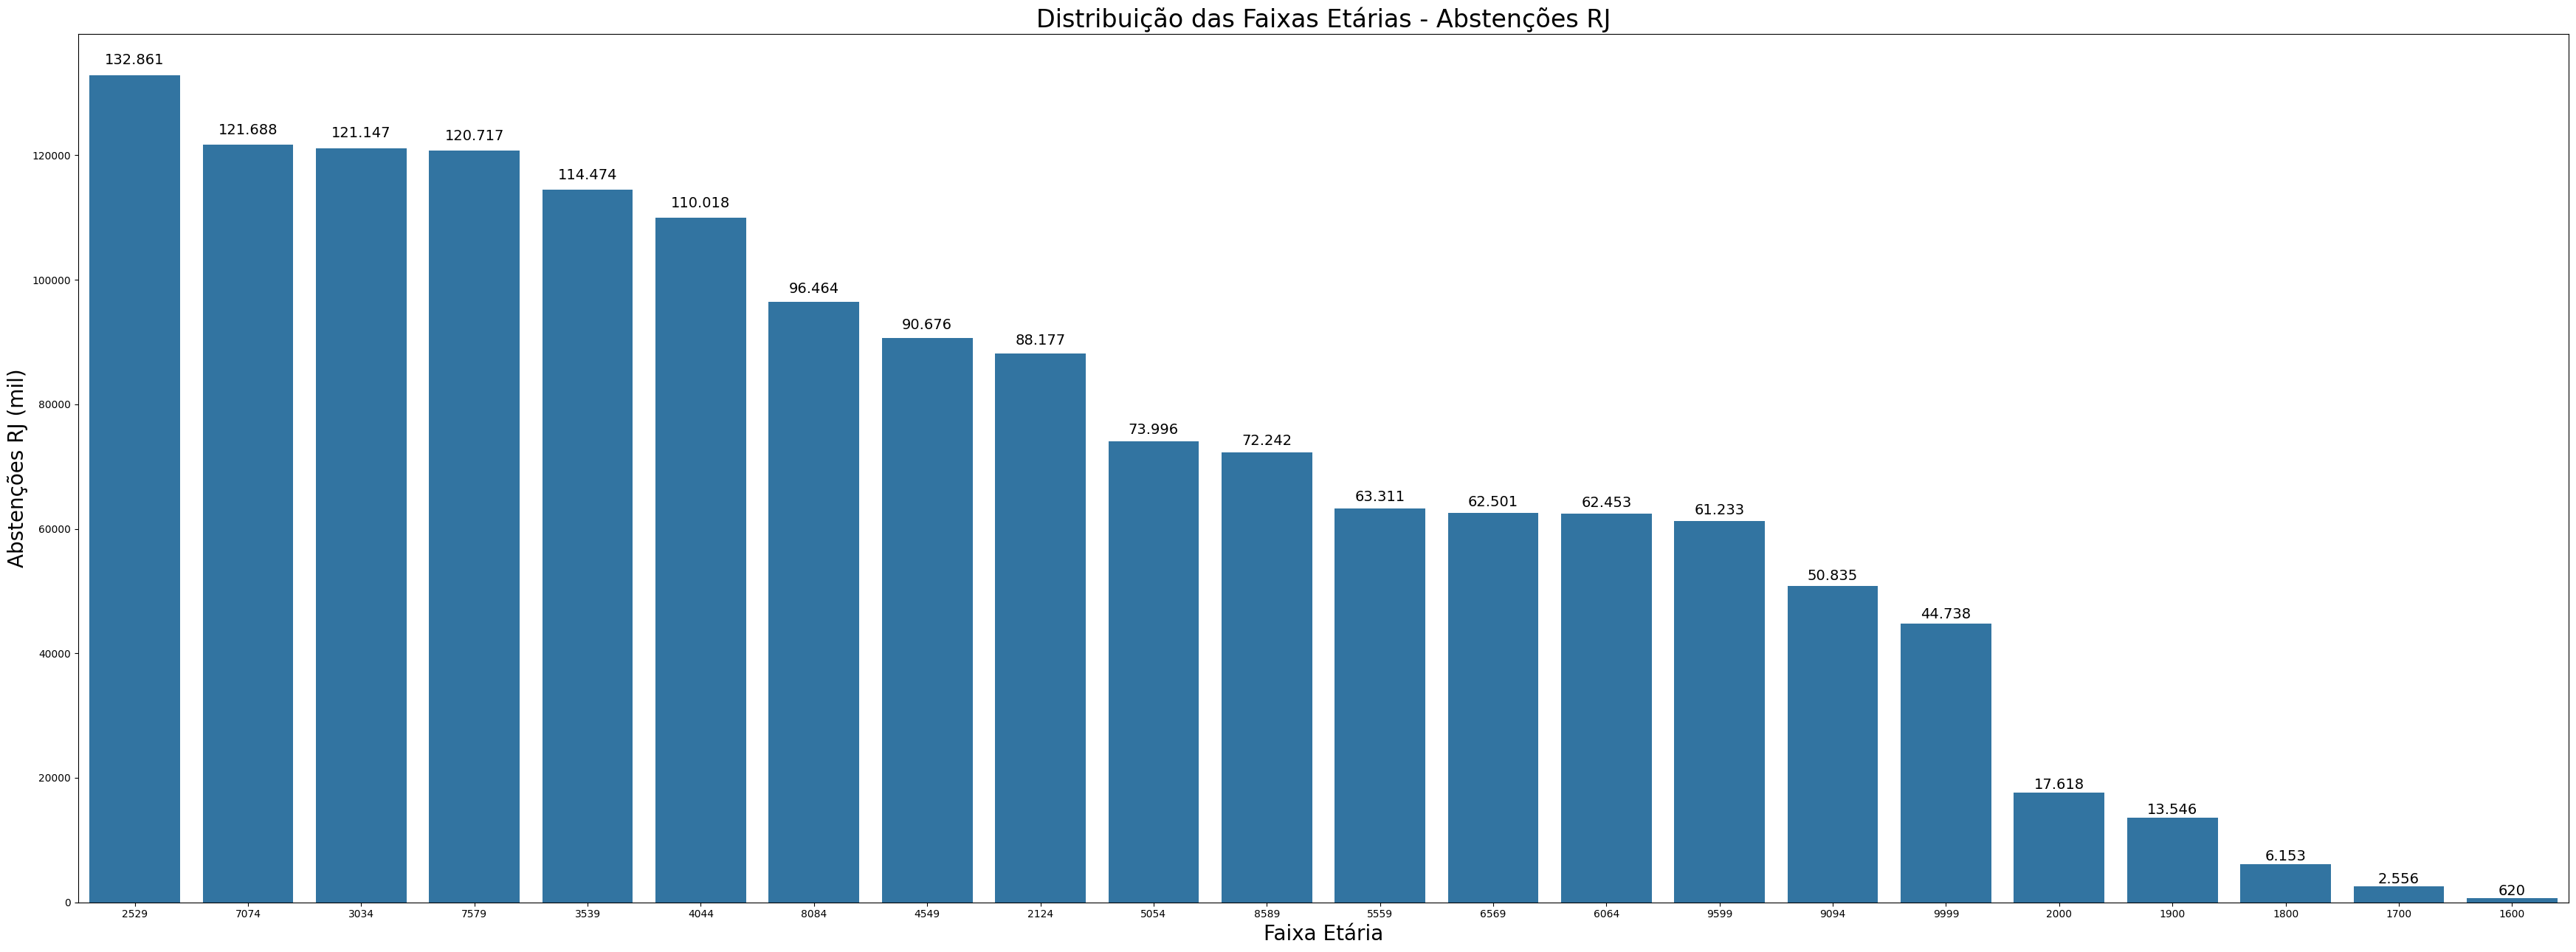

In [34]:
# GRAFICO DE BARRAS
# Distribuição da faixa etária por quantidade de observações (abstencoes)

# Agrupa e soma abstenções por faixa etária
df_soma = df_rj.groupby('CD_FAIXA_ETARIA')['QT_ABSTENCAO'].sum().reset_index()

# Ordena por soma decrescente
df_soma = df_soma.sort_values(by='QT_ABSTENCAO', ascending=False)

# Extrai a ordem das faixas etárias
ordem_faixas = df_soma['CD_FAIXA_ETARIA'].tolist()

# Figura e gráfico de barras ordenado
fig, ax = plt.subplots(figsize=(35, 13))

sns.barplot(
    x='CD_FAIXA_ETARIA',
    y='QT_ABSTENCAO',
    data=df_rj,
    estimator=sum,
    errorbar=None,
    order=ordem_faixas,
    ax=ax
)

ax.set_title('Distribuição das Faixas Etárias - Abstenções RJ', fontsize=24)
ax.set_xlabel('Faixa Etária', fontsize=20)
ax.set_ylabel('Abstenções RJ (mil)', fontsize=20)

for p in ax.patches:
    altura = p.get_height()
    ax.text(
        p.get_x() + p.get_width() / 2.,
        altura + (altura * 0.01),
        f'{int(altura):,}'.replace(',', '.'),
        ha='center', va='bottom', fontsize=14
    )

plt.tight_layout()
plt.show()

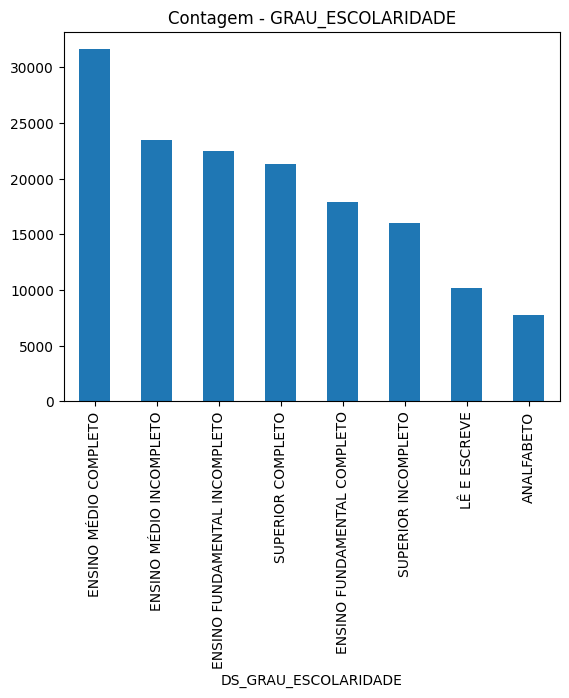

In [35]:

# GRAFICO DE BARRAS
# Distribuição da faixa etária por quantidade de observações (Escolaridade)
# Contagem categórica
_ = df_rj["DS_GRAU_ESCOLARIDADE"].value_counts().plot(kind="bar")
plt.title("Contagem - GRAU_ESCOLARIDADE")
plt.show()



## 5. Definição do target, variáveis e divisão dos dados
**TODO:** escolha o **target** (ou defina a tarefa de clusterização/forecast).  
- Em **séries temporais**, **não embaralhe** e use divisões temporais (ex.: `TimeSeriesSplit`).
- Em **classificação desequilibrada**, considere **estratégias para desbalanceamento** (ex.: `class_weight`, undersampling/oversampling).

> **Atenção:** Todas as **transformações** aprendidas devem ser **ajustadas no treino** e **aplicadas no validação/teste**. Recomendamos usar **pipelines**.


## Nas celulas seguinte estou executando as seguintes acoes:

*   Definir qual é o tipo de tarefa de machine learning que vai resolver.
"classificacao" → prever categorias (ex.: se vai votar ou não).
* Definir as variaves TARGET (número de pessoas que se abstiveram)
* E FEATURES (TODAS POSSIVEIS)
* Depois faz a Divisao dados em Treino e Teste (20%)

* X: todas as variáveis preditoras (features).
* y: a variável alvo (target).
* Usa train_test_split do scikit-learn: test_size=0.2 → 20% dos dados ficam para teste, 80% para treino.
* random_state=SEED → garante que a divisão seja reprodutível (só usa o seed para classificação).


In [36]:
#DEFININDO VARIAVEL TARGET e FEATURES
# Selecione o tipo de problema: 'classificacao' | 'regressao' | 'clusterizacao' | 'serie_temporal'
PROBLEM_TYPE = "classificacao"  # TODO: ajuste

# Defina features e target conforme o problema
if PROBLEM_TYPE == "classificacao":
    target = "QT_ABSTENCAO"
    features = [c for c in df_rj.drop(columns=[target])]
elif PROBLEM_TYPE == "regressao":
    target = "target_reg"
    features = [c for c in df.columns if c not in [target, "timestamp"]]
elif PROBLEM_TYPE == "clusterizacao":
    target = None
    features = [c for c in df.columns if c not in ["target_clf","target_reg","timestamp"]]
elif PROBLEM_TYPE == "serie_temporal":
    target = "target_reg"  # Exemplo
    features = [c for c in df.columns if c not in [target]]
else:
    raise ValueError("PROBLEM_TYPE inválido.")

print("PROBLEM_TYPE:", PROBLEM_TYPE)
print("Target:", target)
print("N features:", len(features))



PROBLEM_TYPE: classificacao
Target: QT_ABSTENCAO
N features: 10


In [37]:
#DIVISAO DADOS TREINO e TESTE (20%)
PROBLEM_TYPE = "classificacao"  # TODO: ajuste

    # Divisão dos dados
if PROBLEM_TYPE in ["classificacao", "regressao"]:
    X = df_rj[features].copy()
    y = df_rj[target].copy()
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=SEED if PROBLEM_TYPE=="classificacao" else None
    )
    print("Treino:", X_train.shape, "| Teste:", X_test.shape)
elif PROBLEM_TYPE == "clusterizacao":
    X = df[features].copy()
    # Sem target — você pode reservar um hold-out para avaliação externa se fizer sentido de negócio.
    X_train, X_test = train_test_split(X, test_size=0.2, random_state=SEED)
    print("Treino:", X_train.shape, "| Teste:", X_test.shape)
elif PROBLEM_TYPE == "serie_temporal":
    # Ordenar por tempo e criar cortes temporais (exemplo simples hold-out temporal)
    df_sorted = df.sort_values("timestamp")
    cutoff = int(len(df_sorted)*0.8)
    train, test = df_sorted.iloc[:cutoff], df_sorted.iloc[cutoff:]
    X_train, y_train = train.drop(columns=[target]), train[target]
    X_test, y_test   = test.drop(columns=[target]),  test[target]
    print("Treino:", X_train.shape, "| Teste:", X_test.shape)

Treino: (120662, 10) | Teste: (30166, 10)



## 6. Tratamento de dados e **Pipeline** de pré-processamento
Crie um **Pipeline** com as etapas necessárias (limpeza, imputação, encoding, escala, seleção de atributos, etc.)  
Isso garante **reprodutibilidade** e evita **vazamento**.


## Nas celulas seguinte estou executando as seguintes acoes:

*   Realiza o pre processamento automatico dos dados antes do treinamento
* Selecao de variaveis numericas e categoricas
*   Criacao do pipeline para variáveis numéricas e categoricas
*  Junta tudo no ColumnTransformer e aplica o pre-processamento
* Para num_cols → aplica numeric_pipe (imputação + padronização).
*  Para cat_cols → aplica categorical_pipe (imputação + one-hot).


In [38]:
num_cols = [c for c in X_train.columns if str(X_train[c].dtype).startswith(("float","int"))]
cat_cols = [c for c in X_train.columns if c not in num_cols and c not in ["DS_GRAU_ESCOLARIDADE", "DS_FAIXA_ETARIA"]]

numeric_pipe = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

categorical_pipe = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

preprocess = ColumnTransformer(transformers=[
    ("num", numeric_pipe, num_cols),
    ("cat", categorical_pipe, cat_cols)
])

print("num_cols:", num_cols[:5], "...")
print("cat_cols:", cat_cols[:5], "...")

num_cols: ['CD_FAIXA_ETARIA', 'CD_GRAU_ESCOLARIDADE', 'QT_APTOS', 'QT_COMPARECIMENTO', 'QT_COMPARECIMENTO_DEFICIENCIA'] ...
cat_cols: [] ...



## 7. Baseline e modelos candidatos
Se possive, comece com uma **baseline simples** (ex.: DummyClassifier/Regressor) e evolua para modelos mais fortes. O baseline pode ser seu primeiro modelo!  

**Compare** ao menos **duas abordagens**.

> Para **deep learning** (visão computacional/NLP/séries), crie uma seção específica (p. ex., `TensorFlow`/`PyTorch`) e documente arquitetura, parâmetros e tempo de treino.


## Nas celulas seguinte estou executando as seguintes acoes:

* Executa processamento do baseline
* Defini modelo baseline e modelos candidatos que serao avaliados
* Todos os modelos são colocados dentro de um Pipeline que aplica:
preprocess (aquele ColumnTransformer com imputação, escala e encoding) para o modelo (o algoritmo escolhido).
* Para os modelos candidatos, avaliei no modelo final:
LogisticRegression: bom para interpretar coeficientes.
RandomForest: mais robusto, lida bem com não-linearidades.

* Os outros (GradientBoosting, HistGradientBoosting, SVM) estão comentados (podem ser ativados se quiser testar), veja comentarios abaixo:

* Quando utilizei outros modelos candidatos como: GrandientBoosting, HistGradientBoosting e SVM, porem notou-se uma demora no momento da avaliacao. Apesar disso o GrandientBoosting chegou em uma accuracia de 80%, conta 79% do RandomForest, mas o tempo de execucao no treino foi bem maior, entao resolvi descartar. Os outros tiveram accuracia abaixo de 50%. Por isso os mesmo estao comentados abaixo no codigo.




In [39]:
# === Baselines ===
if PROBLEM_TYPE == "classificacao":
    baseline = Pipeline(steps=[("pre", preprocess),
                               ("model", DummyClassifier(strategy="most_frequent", random_state=SEED))])
    candidates = {
        "LogisticRegression": Pipeline([("pre", preprocess), ("model", LogisticRegression(solver="saga", max_iter=5000, random_state=SEED))]),
        "RandomForest": Pipeline([("pre", preprocess), ("model", RandomForestClassifier(random_state=SEED))]),
        #"GradientBoosting": Pipeline([("pre", preprocess), ("model", GradientBoostingClassifier(random_state=SEED))]),
        #"HistGradientBoosting": Pipeline([("pre", preprocess), ("model", HistGradientBoostingClassifier(random_state=SEED))]),
        #"SVM": Pipeline([("pre", preprocess), ("model", SVC(probability=True, random_state=SEED))]),
    }
elif PROBLEM_TYPE == "regressao":
    baseline = Pipeline(steps=[("pre", preprocess),
                               ("model", DummyRegressor(strategy="median"))])
    candidates = {
        "Ridge": Pipeline([("pre", preprocess), ("model", Ridge(random_state=SEED))]),
        "RandomForestReg": Pipeline([("pre", preprocess), ("model", RandomForestRegressor(random_state=SEED))])
    }
elif PROBLEM_TYPE == "clusterizacao":
    # baseline não se aplica diretamente; use um método simples (ex.: KMeans com k fixo) como referência.
    baseline = Pipeline(steps=[("pre", preprocess),
                               ("model", KMeans(n_clusters=3, random_state=SEED))])
    candidates = {
        "KMeans_k3": Pipeline([("pre", preprocess), ("model", KMeans(n_clusters=3, random_state=SEED))]),
        "KMeans_k5": Pipeline([("pre", preprocess), ("model", KMeans(n_clusters=5, random_state=SEED))])
    }
elif PROBLEM_TYPE == "serie_temporal":
    # Em séries temporais, a baseline pode ser "naive" (último valor) — aqui, apenas um placeholder.
    # Para modelos clássicos, pode considerar por exemplo Regressores com janelas (feature engineering temporal).
    baseline = None
    candidates = {}
else:
    raise ValueError("PROBLEM_TYPE inválido.")

baseline


Pipeline(steps=[('pre',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['CD_FAIXA_ETARIA',
                                                   'CD_GRAU_ESCOLARIDADE',
                                                   'QT_APTOS',
                                                   'QT_COMPARECIMENTO',
                                                   'QT_COMPARECIMENTO_DEFICIENCIA',
                                                   'QT_ABSTENCAO_DEFICIENCIA',
                                                   'QT_COMPARECIMENTO_TTE',
                                                   'QT_ABSTENCAO_TTE']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  [])])),
                ('model',
                 DummyClassifier(random_state=42, strategy='most_frequent'))])

## Nas celulas seguinte estou executando as seguintes acoes:

* Aqui estou comparando baseline vs candidatos de forma rápida.
* Em vez de usar todos os dados (o que pode ser lento e pesado), pega só 10 mil amostras de treino e 2 mil de teste.
* Garante que os índices de X e y fiquem alinhados (.loc).
* Isso transforma o treino em um benchmark rápido (3 min).
* Mede o tempo de treino, calculando métricas de classificação e consolidando tudo em uma tabela comparativa.


### 7.1 Treino e avaliação rápida (baseline vs candidatos)
Use **métricas adequadas** ao tipo de problema. Documente suas observações.


In [40]:
#AVALIACAO Modelo BASELINE X CANDIDATOS
#Obs. Usando apenas um sample para acelerar benchmark inicial
#tempo de execucao = 3 min

results = {}

# Amostra para acelerar benchmark inicial
X_train_s = X_train.sample(n=10000, random_state=42)
y_train_s = y_train.loc[X_train_s.index]
X_test_s = X_test.sample(n=2000, random_state=42)
y_test_s = y_test.loc[X_test_s.index]

# Baseline
t0 = time.time()
baseline.fit(X_train_s, y_train_s)
t1 = time.time()

y_pred = baseline.predict(X_test_s)
proba = baseline.predict_proba(X_test_s) if hasattr(baseline, "predict_proba") else None
results["baseline"] = evaluate_classification(y_test_s, y_pred, proba)
results["baseline"]["train_time_s"] = round(t1 - t0, 3)

# Candidatos
for name, pipe in candidates.items():
    t0 = time.time()
    pipe.fit(X_train_s, y_train_s)
    t1 = time.time()

    y_pred = pipe.predict(X_test_s)
    proba = pipe.predict_proba(X_test_s) if hasattr(pipe, "predict_proba") else None
    results[name] = evaluate_classification(y_test_s, y_pred, proba)
    results[name]["train_time_s"] = round(t1 - t0, 3)

pd.DataFrame(results).T


,accuracy,f1_weighted,roc_auc,train_time_s
baseline,0.4115,0.239932,NaN,0.016
LogisticRegression,0.4250,0.304535,NaN,226.265
RandomForest,0.7905,0.787896,NaN,2.722


Usando 2 varias categoricas e o restante como numerica (8) a acuracia melhor foi com o RandoForest em 71%.

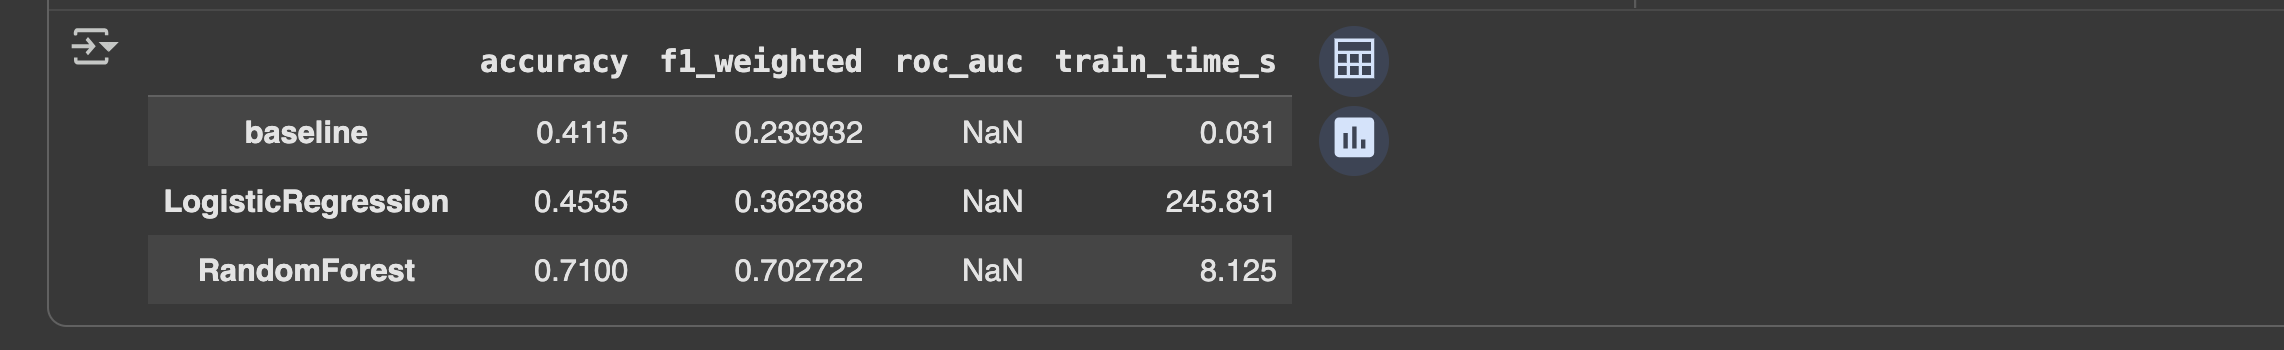
  

Sem usar variaves categoricas e alguns diferentes modelos candidatos, tive os seguintes resultados:

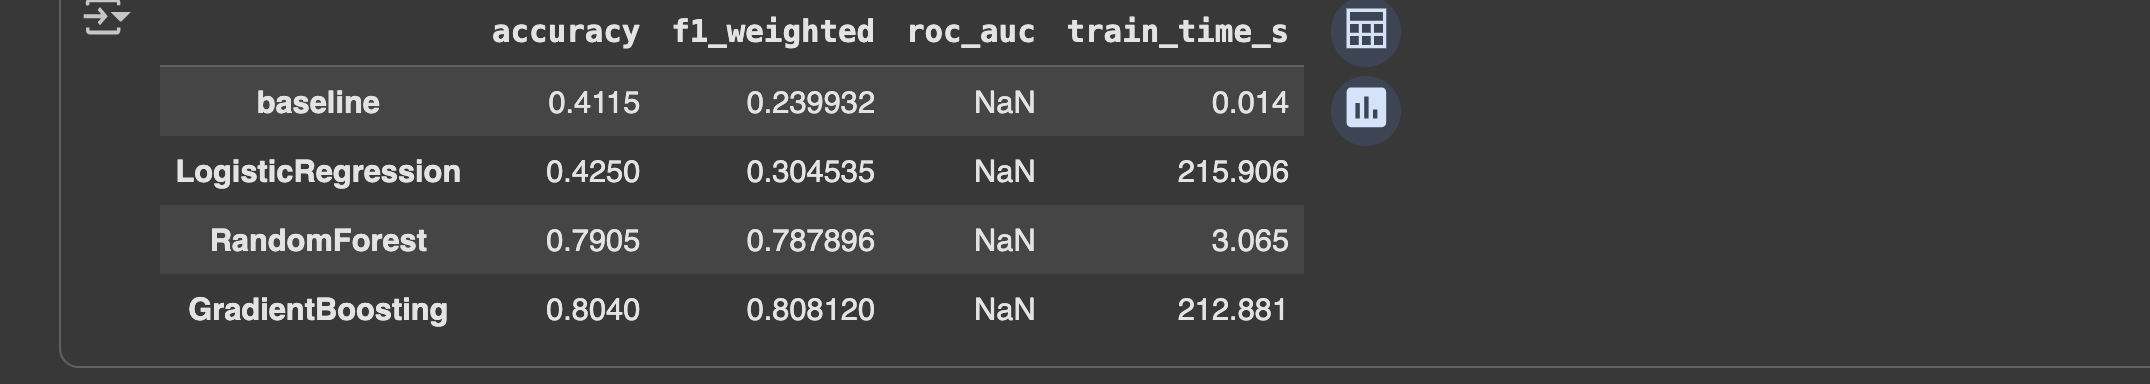

Ao nao usar variaveis categoricas a acuracia melhor foi com o RandoForest em 79%, com GradientBoosting chegou em 80%, porem o tempo de treino foi maior.

## Nas celulas seguinte estou executando as seguintes acoes:

* Realizando a otimizacao do modelo.
* Seleciona somente colunas numéricas.
* Cria um pipeline com:
* SimpleImputer(strategy="median") → preenche valores ausentes com a mediana.
* StandardScaler() → normaliza os dados (média 0, variância 1).

* RandomForestClassifier é o modelo.
Os hiperparâmetros sorteados (param_dist) são:
n_estimators = nº de árvores.
max_depth = profundidade máxima.
min_samples_split = nº mínimo de amostras p/ dividir um nó.
f1_weighted = métrica para balancear classes desbalanceadas.
* Ao final, mostra Mostra o melhor desempenho médio da validação cruzada.
* Mostra os melhores hiperparâmetros sorteados.


## 8. Validação e Otimização de Hiperparâmetros
Use **validação cruzada** apropriada ao problema (Ex: **`StratifiedKFold`** para classificação; **`KFold`** para regressão).  
Faça **tuning** com `GridSearchCV`/`RandomizedSearchCV`.


In [41]:
#Tempo de execucao = 12 minutos
#Mudei numero de Job para 1(antes era -1) e para o numero de iteration para 5, pois com 10 estava demorando muito.
# model utilizado RandomForest por ter uma das melhores acuracias com baixo tempo de treino


# Aqui apenas um exemplo simples (numéricas -> imputer + scaler)
preprocess = ColumnTransformer([
    ("num", Pipeline([
        ("imputer", SimpleImputer(strategy="median")),
        ("scaler", StandardScaler())
    ]), X_train.select_dtypes(include=["int64", "float64"]).columns)
])

# Escolha do problema
PROBLEM_TYPE = "classificacao"  # ou "regressao", "clusterizacao", "serie_temporal"

if PROBLEM_TYPE == "classificacao":
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=SEED)
    model = Pipeline([("pre", preprocess), ("model", RandomForestClassifier(random_state=SEED))])
    #model = Pipeline([("pre", preprocess), ("model", GradientBoostingClassifier(random_state=SEED))])

    param_dist = {
        "model__n_estimators": randint(100, 400),
        "model__max_depth": randint(3, 20),
        "model__min_samples_split": randint(2, 10)
    }
    scorer = "f1_weighted"

elif PROBLEM_TYPE == "regressao":
    cv = KFold(n_splits=5, shuffle=True, random_state=SEED)
    model = Pipeline([("pre", preprocess), ("model", RandomForestRegressor(random_state=SEED))])
    param_dist = {
        "model__n_estimators": randint(100, 400),
        "model__max_depth": randint(3, 20),
        "model__min_samples_split": randint(2, 10)
    }
    scorer = "neg_root_mean_squared_error"

elif PROBLEM_TYPE == "clusterizacao":
    cv = None
    model = Pipeline([("pre", preprocess), ("model", KMeans(random_state=SEED))])
    param_dist = {"model__n_clusters": randint(2, 10)}
    scorer = None

elif PROBLEM_TYPE == "serie_temporal":
    cv = TimeSeriesSplit(n_splits=5)
    model = Pipeline([("pre", preprocess), ("model", RandomForestRegressor(random_state=SEED))])
    param_dist = {
        "model__n_estimators": randint(100, 300),
        "model__max_depth": randint(3, 15)
    }
    scorer = "neg_mean_absolute_error"

# Execução da busca
if PROBLEM_TYPE != "clusterizacao":
    search = RandomizedSearchCV(
        model,
        param_distributions=param_dist,
        n_iter=5,
        cv=cv,
        scoring=scorer,
        random_state=SEED,
        #n_jobs=-1,
        n_jobs=1,
        verbose=1
    )
    search.fit(X_train, y_train)



    print("Melhor score (CV):", search.best_score_)
    print("Melhores parâmetros:", search.best_params_)

else:
    print("Para clusterização, varra k de 2 a 10 e compare silhouette/índices de validade.")


Fitting 5 folds for each of 5 candidates, totalling 25 fits
Melhor score (CV): 0.811315682594986
Melhores parâmetros: {'model__max_depth': 13, 'model__min_samples_split': 4, 'model__n_estimators': 187}


* 81% de melhor score apos otimizacao com duas variaveis categorias.

* sem variaveis categoricas tambem ficou em 81%


## Nas celulas seguinte estou executando as seguintes acoes:

* Avaliacao final do modelo: Pega o melhor modelo encontrado (best_estimator_) e faz as predições em X_test.
* Imprime precisão (precision), revocação (recall), f1-score e suporte para cada classe.
* Plota a matriz de confusão automaticamente a partir do modelo treinado.


## 9. Avaliação final, análise de erros e limitações
- **Compare** baseline vs melhor modelo.  
- Faça **análise de erros** (ex.: matriz de confusão, casos pior previstos, resíduos).  
- Discuta **limitações**: dados, métricas, viés, generalização.


              precision    recall  f1-score   support

           0       1.00      0.99      1.00     12975
           1       0.97      0.99      0.98      7096
           2       0.86      0.93      0.90      2091
           3       0.77      0.80      0.78      1195
           4       0.64      0.64      0.64       706
           5       0.54      0.56      0.55       547
           6       0.39      0.49      0.43       405
           7       0.53      0.40      0.45       329
           8       0.51      0.40      0.45       248
           9       0.29      0.40      0.34       257
          10       0.33      0.40      0.36       210
          11       0.30      0.34      0.32       184
          12       0.26      0.27      0.27       138
          13       0.27      0.35      0.31       152
          14       0.29      0.30      0.30       133
          15       0.35      0.29      0.32       127
          16       0.25      0.24      0.25       116
          17       0.27    

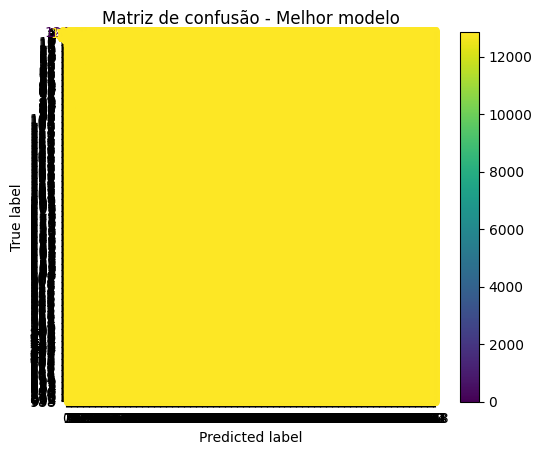

In [17]:
# Exemplo de re-treino no conjunto de treino+validação (se aplicável) e avaliação no teste
# 4 min

if PROBLEM_TYPE in ["classificacao", "regressao"] and 'search' in globals() and hasattr(search, "best_estimator_"):
    best_model = search.best_estimator_
    y_pred = best_model.predict(X_test)
    if PROBLEM_TYPE == "classificacao":
        from sklearn.metrics import classification_report, ConfusionMatrixDisplay
        print(classification_report(y_test, y_pred))
        try:
            ConfusionMatrixDisplay.from_estimator(best_model, X_test, y_test)
            plt.title("Matriz de confusão - Melhor modelo")
            plt.show()
        except Exception as e:
            print("Não foi possível plotar a matriz de confusão:", e)
    else:
        print('Metricas para avaliar a regressão: ', evaluate_regression(y_test, y_pred))
elif PROBLEM_TYPE == "clusterizacao":
    print("Realize análise qualitativa/negócio dos clusters. Visualize centros e perfis.")
elif PROBLEM_TYPE == "serie_temporal":
    print("Avalie métricas fora do tempo; plote série real vs prevista.")


## 9. Conclusões
**TODO:** Como conclusao apos as etapas acima, posso afirmar que o modelo definido ficou com uma acuracia de 82% apos otimizacao. Indicando que a partir da entrada de novos dados como: Grau de Escolaridade e Faixa etaria de um eleitor, o modelo podera determinar se o mesmo nao irar votar (abstencao).

Com relacao aos modelos avaliados: RandomForest se apresentou com melhor accuracia, chegando a 82% pela metric f1-score.

GradientBoostingClassifier foi avaliado - Para esse modelo candidato teve uma otima acuracia de 80%, bem parecida ao RandomForest, porem com maior tempo de treino na fase otimimizacao e se mostrou bem mais demorado (mais de 30 minutos).
Usei ainda HistGradientBoosting	 e SVM que nao tiveram uma acuracia boa, abaixo de 50%. Desta forma para a amostra utilizada tendo 2 variaveis categorias, o modelo RandomForest se apresentou com melhor accuracia, chegando a 82% pela metric f1-score. O Randomforest tambem apresentou a mesma acuracia ao nao usar variaveis categoricas no treinamento.


## 10. Próximos passos e limitacoes
Nao consegui avaliar o modelo com dados novos, pois a execucao ficou muito demorada e acabou tendo estouro de RAM, acredito que seja uma limitacao do meu computador. Desta forma seria interessante rodar em uma maquina virtual na nuvem para confirmar a acuracia com dados nunca vistos pelo modelo.

Outro ponto possivel, seria executar o mesmo processo para municipios menores onde a quantidade de amostras seria menor e avaliar como o modelo se comportar nessa situacao.

#11. Entrada de dados novos (Nao realizei por limitacao de CPU/RAM)

In [ ]:
# Seleciona o modelo com pipeline completo
modelo = candidates["RandomForest"]

# Treinamento
modelo.fit(X_train, y_train)

# Simulação de novos dados (somente as features originais, sem target)
novos_dados = pd.DataFrame({
    "DS_FAIXA_ETARIA": ["16 a 20 anos", "30 a 34 anos", "60 a 64 anos"],
    "DS_GRAU_ESCOLARIDADE": ["Ensino Fundamental incompleto",
                             "Ensino Médio completo",
                             "Ensino Superior completo"]
})

# Predição
y_pred = modelo.predict(novos_dados)
y_proba = modelo.predict_proba(novos_dados)

# Resultado organizado
resultados = novos_dados.copy()
resultados["Classe_Prevista"] = y_pred
resultados["Prob_Nao_Votar"] = y_proba[:, 0]
resultados["Prob_Votar"] = y_proba[:, 1]

print(resultados)



## 12. Salvando artefatos (modelos e pipeline)
Se o treinamento dos modelos demora mais de 3 minutos, recomendamos salvar o **modelo/pipeline** após o treinamento e depois apenas carregar o arquivo (ex: .pkl, .h5) salvo em outra célula, sem precisar treinar novamente.  